In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linearmodel import SGDCClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import csv

In [3]:
income_data=pd.read_csv("OneDrive\Documents\income_evaluation.csv")
income_data.head(10)

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   
5   37            Private   284582     Masters              14   
6   49            Private   160187         9th               5   
7   52   Self-emp-not-inc   209642     HS-grad               9   
8   31            Private    45781     Masters              14   
9   42            Private   159449   Bachelors              13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex   capital-gain   capital-loss   hours-per-week  native-country  \
0     Male           2174              0               40   United-States   
1     Male              0              0               13   United-States   
2     Male              0              0               40   United-States   
3     Male              0              0               40   United-States   
4   Female              0              0               40            Cuba   
5   Female              0              0               40   United-States   
6   Female              0              0               16         Jamaica   
7     Male              0              0               45   United-States   
8   Female          14084              0               50   United-States   
9     Male           5178              0               40   United-States   

   income  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K  
5   <=50K  
6   <=50K  
7    >50K  
8    >50K  
9    >50K

In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income_data.isnull().any() #check no null values

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [6]:
income_data.shape

(32561, 15)

In [7]:
for x in income_data.columns:
    x_new = x.strip()
    income_data=income_data.rename(columns={x:x_new})

income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
data = income_data.drop(["fnlwgt","capital-gain","capital-loss","native-country"],axis=1)
data.head(10)

age          workclass   education  education-num          marital-status  \
0   39          State-gov   Bachelors             13           Never-married   
1   50   Self-emp-not-inc   Bachelors             13      Married-civ-spouse   
2   38            Private     HS-grad              9                Divorced   
3   53            Private        11th              7      Married-civ-spouse   
4   28            Private   Bachelors             13      Married-civ-spouse   
5   37            Private     Masters             14      Married-civ-spouse   
6   49            Private         9th              5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad              9      Married-civ-spouse   
8   31            Private     Masters             14           Never-married   
9   42            Private   Bachelors             13      Married-civ-spouse   

           occupation    relationship    race      sex  hours-per-week  income  
0        Adm-clerical   Not-in-family   White     Male              40   <=50K  
1     Exec-managerial         Husband   White     Male              13   <=50K  
2   Handlers-cleaners   Not-in-family   White     Male              40   <=50K  
3   Handlers-cleaners         Husband   Black     Male              40   <=50K  
4      Prof-specialty            Wife   Black   Female              40   <=50K  
5     Exec-managerial            Wife   White   Female              40   <=50K  
6       Other-service   Not-in-family   Black   Female              16   <=50K  
7     Exec-managerial         Husband   White     Male              45    >50K  
8      Prof-specialty   Not-in-family   White   Female              50    >50K  
9     Exec-managerial         Husband   White     Male              40    >50K

In [9]:
for column in data[["workclass","education","marital-status","occupation","race","sex"]]:
    data[column] = data[column].str.strip()
data.head(10)

age         workclass  education  education-num         marital-status  \
0   39         State-gov  Bachelors             13          Never-married   
1   50  Self-emp-not-inc  Bachelors             13     Married-civ-spouse   
2   38           Private    HS-grad              9               Divorced   
3   53           Private       11th              7     Married-civ-spouse   
4   28           Private  Bachelors             13     Married-civ-spouse   
5   37           Private    Masters             14     Married-civ-spouse   
6   49           Private        9th              5  Married-spouse-absent   
7   52  Self-emp-not-inc    HS-grad              9     Married-civ-spouse   
8   31           Private    Masters             14          Never-married   
9   42           Private  Bachelors             13     Married-civ-spouse   

          occupation    relationship   race     sex  hours-per-week  income  
0       Adm-clerical   Not-in-family  White    Male              40   <=50K  
1    Exec-managerial         Husband  White    Male              13   <=50K  
2  Handlers-cleaners   Not-in-family  White    Male              40   <=50K  
3  Handlers-cleaners         Husband  Black    Male              40   <=50K  
4     Prof-specialty            Wife  Black  Female              40   <=50K  
5    Exec-managerial            Wife  White  Female              40   <=50K  
6      Other-service   Not-in-family  Black  Female              16   <=50K  
7    Exec-managerial         Husband  White    Male              45    >50K  
8     Prof-specialty   Not-in-family  White  Female              50    >50K  
9    Exec-managerial         Husband  White    Male              40    >50K

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
#workclass labels
lb_workclass = preprocessing.LabelEncoder()
lb_workclass.fit(["Private","Self-emp-not-inc","Local-gov","?",
                  "State-gov","Self-emp-inc",
                 "Federal-gov","Without-pay","Never-worked"])
data.iloc[:,1] = lb_workclass.transform(data.iloc[:,1])

#education labels
lb_educ = preprocessing.LabelEncoder()
lb_educ.fit(["HS-grad","Some-college","Bachelors","Masters",
             "Assoc-voc","11th","Assoc-acdm","10th","7th-8th","Prof-school",
             "9th","12th","Doctorate","5th-6th","1st-4th","Preschool"])
data.iloc[:,2] = lb_educ.transform(data.iloc[:,2])

#marriage labels
lb_marry = preprocessing.LabelEncoder()
lb_marry.fit(["Married-civ-spouse","Never-married","Divorced","Separated",
              "Widowed","Married-spouse-absent","Married-AF-spouse"])
data.iloc[:,4] = lb_marry.transform(data.iloc[:,4])

#occupation labels
lb_occ = preprocessing.LabelEncoder()
lb_occ.fit(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'])
data.iloc[:,5] = lb_occ.transform(data.iloc[:,5])
#relationship labels
lb_rel = preprocessing.LabelEncoder()
lb_rel.fit([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'])
data.iloc[:,6] = lb_rel.transform(data.iloc[:,6])

#race labels
lb_race = preprocessing.LabelEncoder()
lb_race.fit(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'])
data.iloc[:,7] = lb_race.transform(data.iloc[:,7])

#gender labels
lb_sex = preprocessing.LabelEncoder()
lb_sex.fit(['Male', 'Female'])
data.iloc[:,8] = lb_sex.transform(data.iloc[:,8])

In [12]:
X=data.iloc[:,:-1]
y=data[["income"]]
X,y

(       age  workclass  education  education-num  marital-status  occupation  \
 0       39          7          9             13               4           1   
 1       50          6          9             13               2           4   
 2       38          4         11              9               0           6   
 3       53          4          1              7               2           6   
 4       28          4          9             13               2          10   
 ...    ...        ...        ...            ...             ...         ...   
 32556   27          4          7             12               2          13   
 32557   40          4         11              9               2           7   
 32558   58          4         11              9               6           1   
 32559   22          4         11              9               4           1   
 32560   52          5         11              9               2           4   
 
        relationship  race  sex  hours

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [14]:
print("Size of train set:", X_train.shape, y_train.shape)
print("Size of test set: ", X_test.shape, y_test.shape)

Size of train set: (26048, 10) (26048, 1)
Size of test set:  (6513, 10) (6513, 1)


In [15]:
#decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

incomeGuess = DecisionTreeClassifier(criterion="entropy",max_depth=3)
incomeGuess

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
incomeGuess.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
predict_income = incomeGuess.predict(X_test)

In [19]:
from sklearn import metrics
print("Accuracy of decision tree model regarding to income prediction: ", metrics.accuracy_score(y_test,predict_income))

Accuracy of decision tree model regarding to income prediction:  0.8257331490864425


In [20]:
print('Train accuracy:', incomeGuess.fit(X_train, y_train).score(X_train, y_train))

Train accuracy: 0.8219057125307125


In [21]:
print('train vs test:', 1-incomeGuess.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,predict_income))

train vs test: 0.17809428746928746 0.17426685091355754


In [22]:
print(classification_report(y_test,predict_income))
print(confusion_matrix(y_test,predict_income))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      4972
        >50K       0.73      0.42      0.53      1541

    accuracy                           0.83      6513
   macro avg       0.78      0.69      0.71      6513
weighted avg       0.81      0.83      0.81      6513

[[4728  244]
 [ 891  650]]


In [23]:
accuracy_list=[]
for i in range(1,10):
    incomeGuess = DecisionTreeClassifier(criterion="entropy",max_depth=i)
    incomeGuess.fit(X_train,y_train)
    predict_income = incomeGuess.predict(X_test)
    print("Accuracy with depth {}: ".format(i), metrics.accuracy_score(y_test,predict_income))
    accuracy_list.append(metrics.accuracy_score(y_test,predict_income))
print(accuracy_list)

Accuracy with depth 1:  0.7633962843543682
Accuracy with depth 2:  0.8198986642100414
Accuracy with depth 3:  0.8257331490864425
Accuracy with depth 4:  0.8249654537079687
Accuracy with depth 5:  0.8248119146322739
Accuracy with depth 6:  0.8171349608475357
Accuracy with depth 7:  0.8203592814371258
Accuracy with depth 8:  0.81759557807462
Accuracy with depth 9:  0.8180561953017043
[0.7633962843543682, 0.8198986642100414, 0.8257331490864425, 0.8249654537079687, 0.8248119146322739, 0.8171349608475357, 0.8203592814371258, 0.81759557807462, 0.8180561953017043]


<ipython-input-65-86a248c652ea>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'max depth vs accuracy')

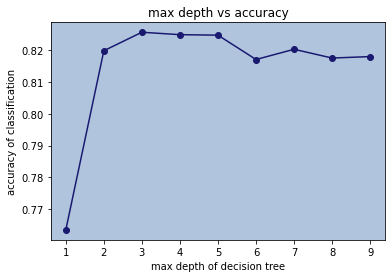

In [65]:
plt.plot(range(1,10),accuracy_list,color='midnightblue', marker='o')
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.xlabel('max depth of decision tree')
plt.ylabel('accuracy of classification')
plt.title('max depth vs accuracy')

In [30]:
#KNN

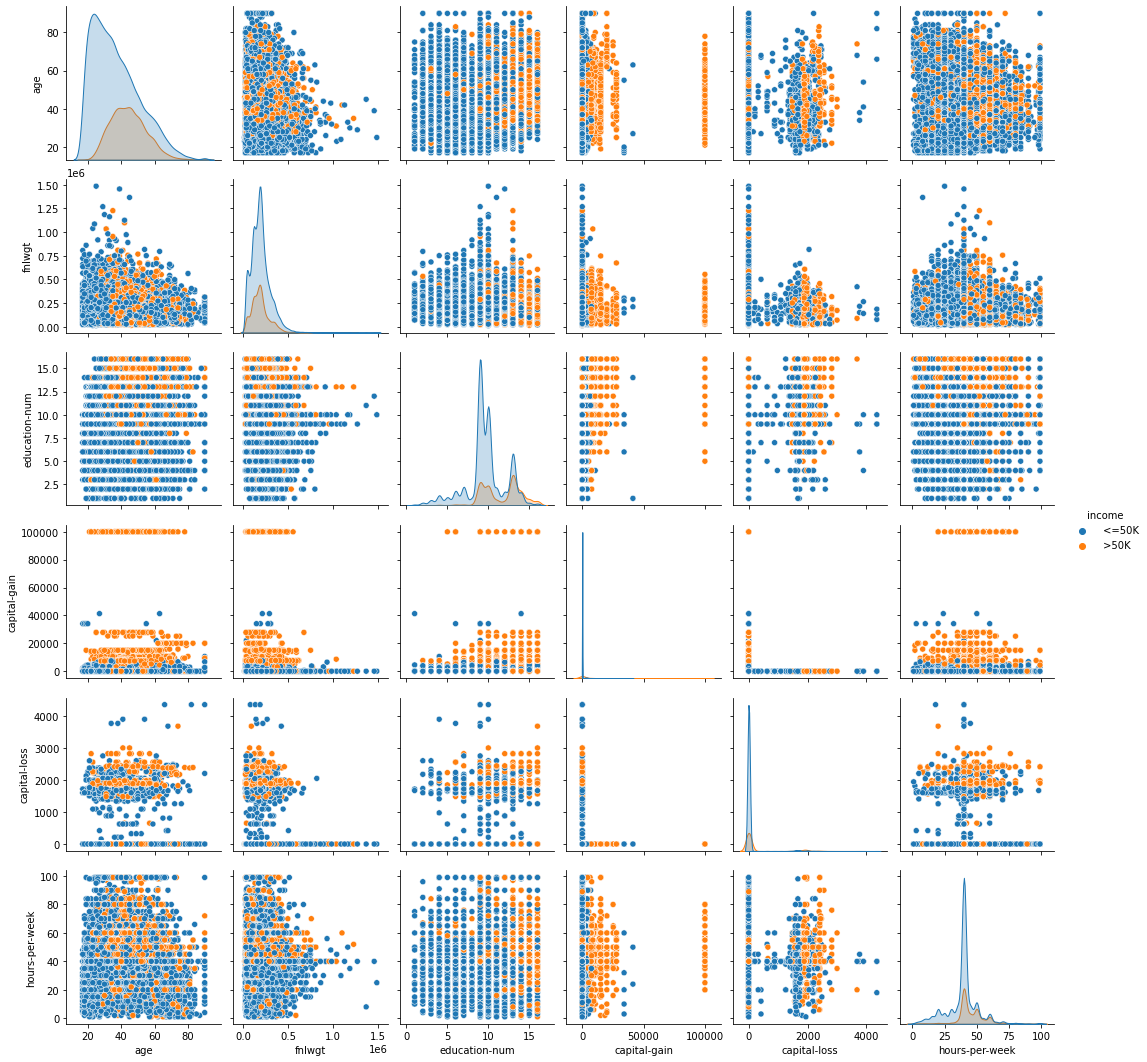

In [26]:
sns.pairplot(income_data,hue='income')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
list2=[]
for i in range(1,40):
    #Train the model
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,np.ravel(y_train))
    y_pred=neigh.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    list2.append(acc)
    print(i,acc)

1 0.7707661599877169
2 0.7947182557961001
3 0.7907262398280362
4 0.8051589129433441
5 0.7970213419315215
6 0.8080761553815446
7 0.7962536465530478
8 0.8046982957162598
9 0.8031629049593122
10 0.8051589129433441
11 0.8022416705051436
12 0.8082296944572394
13 0.8025487486565331
14 0.8093044679871028
15 0.8030093658836174
16 0.8082296944572394
17 0.804544756640565
18 0.8100721633655765
19 0.8074619990787656
20 0.8088438507600184
21 0.8051589129433441
22 0.809765085214187
23 0.8050053738676494
24 0.8088438507600184
25 0.805926608321818
26 0.8099186242898818
27 0.8083832335329342
28 0.8083832335329342
29 0.8074619990787656
30 0.8079226163058498
31 0.8074619990787656
32 0.8088438507600184
33 0.8086903116843237
34 0.8082296944572394
35 0.8070013818516812
36 0.8100721633655765
37 0.8057730692461231
38 0.8088438507600184
39 0.8066943037002917


<ipython-input-64-94ff61cd7c0d>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'K-value vs accuracy')

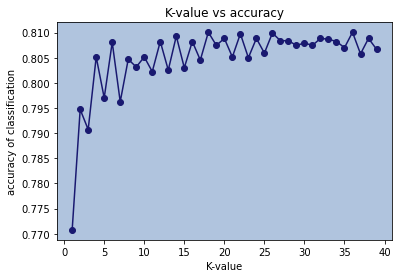

In [64]:
plt.plot(range(1,40),list2,color='midnightblue', marker='o')
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.xlabel('K-value')
plt.ylabel('accuracy of classification')
plt.title('K-value vs accuracy')

In [34]:
    #k=17 enough
neigh=KNeighborsClassifier(n_neighbors=17).fit(X_train,np.ravel(y_train))
    y_pred=neigh.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      4972
        >50K       0.59      0.56      0.57      1541

    accuracy                           0.80      6513
   macro avg       0.73      0.72      0.72      6513
weighted avg       0.80      0.80      0.80      6513

[[4379  593]
 [ 680  861]]


In [35]:
print('train vs test:', 1-neigh.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,y_pred))

<ipython-input-35-0ec775a92459>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  print('train vs test:', 1-neigh.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,y_pred))


train vs test: 0.17149109336609336 0.19545524335943498


In [36]:
#logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_r = LogisticRegression(C=0.01,solver="liblinear").fit(X_train,np.ravel(y_train))
y_hat = log_r.predict(X_test)
y_hat

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [38]:
import math
con_mat = confusion_matrix(y_test,y_hat)
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print(con_mat)
print('Total accuracy of income model: %.2f' % total_accuracy)
print('Accuracy "Income more than 50K": %.2f' % class1_accuracy)
print('Accuracy "Income less than 50K": %.2f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

[[4677  295]
 [ 943  598]]
Total accuracy of income model: 0.81
Accuracy "Income more than 50K": 0.94
Accuracy "Income less than 50K": 0.39
Geometric mean accuracy: 0.60418


In [39]:
print(classification_report(y_test,y_hat))
print(confusion_matrix(y_test,y_hat))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      4972
        >50K       0.67      0.39      0.49      1541

    accuracy                           0.81      6513
   macro avg       0.75      0.66      0.69      6513
weighted avg       0.79      0.81      0.79      6513

[[4677  295]
 [ 943  598]]


In [40]:
print('train vs test:', 1-log_r.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,y_hat))

train vs test: 0.19936271498771496 0.19008137571011818


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
#random forest classifier

In [42]:
rfc=RandomForestClassifier(n_estimators=200, max_depth=8) #8 is enough
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

<ipython-input-42-c1e7176b12af>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [43]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4972
        >50K       0.68      0.54      0.60      1541

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513

[[4580  392]
 [ 704  837]]


In [44]:
print('train vs test:', 1-rfc.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,pred_rfc))

<ipython-input-44-00b686b1b1c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print('train vs test:', 1-rfc.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,pred_rfc))


train vs test: 0.1541385135135135 0.16827882696146168


In [45]:
list3=[]
for i in range(1,20):
    rfc=RandomForestClassifier(n_estimators=200,max_depth=i)
    rfc.fit(X_train,y_train)
    pred_rfc=rfc.predict(X_test)
    print("Accuracy with depth {}: ".format(i), metrics.accuracy_score(y_test,pred_rfc))
    list3.append(metrics.accuracy_score(y_test,pred_rfc))

<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 1:  0.7633962843543682


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 2:  0.8200522032857362


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 3:  0.820205742361431


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 4:  0.8241977583294948


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 5:  0.8245048364808844


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 6:  0.8281897742975587


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 7:  0.8314140948871488


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 8:  0.8315676339628435


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 9:  0.8304928604329802


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 10:  0.8300322432058959


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 11:  0.8306463995086749


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 12:  0.8297251650545063


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 13:  0.8288039306003377


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 14:  0.8306463995086749


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 15:  0.8309534776600644


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 16:  0.8271150007676954


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 17:  0.826654383540611


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 18:  0.8229694457239367


<ipython-input-45-6ab5cb6ded8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Accuracy with depth 19:  0.8174420389989252


<ipython-input-63-50eb7e27e34b>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'max depth vs accuracy')

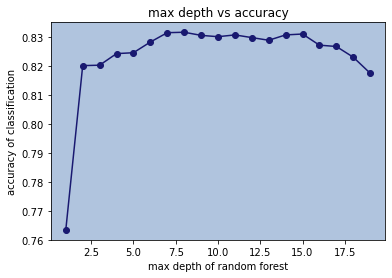

In [63]:
plt.plot(range(1,20),list3,color='midnightblue', marker='o')
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.xlabel('max depth of random forest')
plt.ylabel('accuracy of classification')
plt.title('max depth vs accuracy')

In [44]:
#SVM classifier

In [46]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4972
        >50K       0.70      0.38      0.49      1541

    accuracy                           0.81      6513
   macro avg       0.77      0.66      0.69      6513
weighted avg       0.80      0.81      0.79      6513

[[4727  245]
 [ 961  580]]


In [48]:
print('train vs test:', 1-clf.fit(X_train, y_train).score(X_train, y_train), 1-metrics.accuracy_score(y_test,pred_clf))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


train vs test: 0.19318181818181823 0.18516812528788573
